  # Sentiment Analysis
- By Anubhav Sharma

In this mini project I will analyse reviews of baby products on amazon and classify them as a positive or a negative review . I will make two models , one with more words and second with selected words and see which model has better accuracy

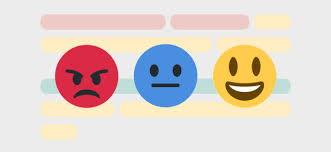

In [73]:
import turicreate as tc

## Reading the dataset

In [74]:
products=tc.SFrame.read_csv('amazon_baby.csv')

Finished parsing file /home/anubhav/amazon_baby.csv

Parsing completed. Parsed 100 lines in 1.46412 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 105270 lines. Lines per second: 57330.1

Finished parsing file /home/anubhav/amazon_baby.csv

Parsing completed. Parsed 183531 lines in 2.33396 secs.

## Exploring dataset

In [75]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4


In [76]:
products.show()

Materializing SFrame

In [77]:
products.groupby('name',operations={'count':tc.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


So we can see that giraffe Teether got most number of reviews so we will analyse it

## Examine the most reviewed product

In [78]:
giraffe_reviews=products[products['name']=='Vulli Sophie the Giraffe Teether']

In [79]:
giraffe_reviews

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3


In [80]:
len(giraffe_reviews)

785

In [81]:
giraffe_reviews['rating']=giraffe_reviews['rating'].astype(float)

In [82]:
giraffe_reviews['rating'].show()

Materializing SArray

So we can see that many people have rated it as 5 star which means it is loved among the customers .

# Building Sentiment Classifier

So we will make 2 sentiment classifiers and compare them in the end to check which have less error

## Model 1

### Word count vector

We will make a word count vector where we will count the occurance of words in each review

In [83]:
products['word_count']=tc.text_analytics.count_words(products['review'])
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


### Defining what's positive and what's negative


In [84]:
products['rating']=products['rating'].astype(float)

In [85]:
products['rating'].show()

Materializing SArray

Since we can say that 4 and 5 Star ratings are good and 1,2 star ratings are bad therefore we will  ignore all the 3 star ratings 

In [86]:
products=products[products['rating']!= 3]

positive sentiment= 4 stars and 5 stars

In [87]:
products['sentiment'] = products['rating'] >= 4

In [88]:
products['sentiment'].show()

Materializing SArray

### Training our Sentiment classifier

In [89]:
train_data,test_data=products.random_split(0.8,seed=0)

In [90]:
sentiment_model = tc.logistic_classifier.create(train_data,target='sentiment',features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.835817     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 4.308260     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 5.500216     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 6.288186     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 7.493368     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 11.861196    | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

### Prediction

In [91]:
products['predicted_sentiment']=sentiment_model.predict(products,output_type='class')

In [92]:
products

name,review,rating,word_count,sentiment,predicted_sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1,1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1,1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1,1


### Evaluation

In [93]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9342357833151299,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.33047871872321255,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.

 **Accuracy of model 1 is 0.917**

In [94]:
tc.evaluation.confusion_matrix(products['sentiment'], products['predicted_sentiment'])

target_label,predicted_label,count
1,1,137690
0,0,23339
0,1,3154
1,0,2569


### Giraffe reviews

In [95]:
giraffe_reviews=products[products['name']=='Vulli Sophie the Giraffe Teether']
giraffe_reviews

name,review,rating,word_count,sentiment,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0,0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1,1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1,1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1,1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1,1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",1,1


In [96]:
giraffe_reviews=giraffe_reviews.sort('predicted_sentiment',ascending=False)
giraffe_reviews

name,review,rating,word_count,sentiment,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,When I first recevied thegift I thought it was ...,5.0,"{'condition': 1.0,'great': 1.0, 'seem': ...",1,1
Vulli Sophie the GiraffeTeether ...,This was recommended by afriend and I have gifted ...,5.0,"{'recipients': 1.0,'hit': 1.0, 'big': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,My 4-month-old loves it!It's easy for him to ...,5.0,"{'sophie': 1.0, 'on':1.0, 'gnaw': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,My baby loves thisteether. She likes to ...,5.0,"{'of': 1.0, 'each': 1.0,'two': 1.0, 'be': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,We bought this when myson was 3 months old and ...,5.0,"{'chew': 1.0, 'need':1.0, 'his': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,We love Sophie at ourhouse... she is a great ...,5.0,"{'so': 1.0, 'too': 1.0,'which': 1.0, 'natural': ...",1,1
Vulli Sophie the GiraffeTeether ...,How can you not love theSophie Teether?It's ...,5.0,"{'will': 1.0, 'this':1.0, 'all': 1.0, 'and': ...",1,1
Vulli Sophie the GiraffeTeether ...,Right out of the box andinto my little ones ...,4.0,"{'money': 1.0, 'worth':1.0, 'ears': 1.0, 'no ...",1,1
Vulli Sophie the GiraffeTeether ...,My daughter just lovesSophie the Giraffe. We ...,5.0,"{'will': 2.0, 'please':1.0, 'are': 1.0, ...",1,1
Vulli Sophie the GiraffeTeether ...,My daughter started usingthis teether at 4 mon ...,5.0,"{'for': 1.0, 'goes': 1.0,'her': 1.0, 'favorite': ...",1,1


In [97]:
giraffe_reviews.tail()

name,review,rating,word_count,sentiment,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,I was so looking forwardto getting this for my ...,1.0,"{'amazon': 1.0, 'back':1.0, 'by': 1.0, 'more': ...",0,0
Vulli Sophie the GiraffeTeether ...,"Going by the Amazonreviews, there was too ...",2.0,"{'buying': 1.0, 'before':1.0, 'secrets': 1.0, ...",0,0
Vulli Sophie the GiraffeTeether ...,We received the Sophie ona Wednesday and by ...,1.0,"{'almost': 1.0, 'sturdy':1.0, 'of': 1.0, 'was': ...",0,0
Vulli Sophie the GiraffeTeether ...,Baby has not interest inthis teething toy. Not ...,1.0,"{'bathtub': 1.0, 'keep':1.0, 'away': 1.0, 'get': ...",0,0
Vulli Sophie the GiraffeTeether ...,I received this as a babyshower gift. I had pu ...,1.0,"{'dollar': 1.0, '17':1.0, 'worth': 1.0, ...",0,0
Vulli Sophie the GiraffeTeether ...,I had a Sophie I hadforgotten I bought. ...,1.0,"{'ones': 1.0, 'given':1.0, 'haven': 1.0, ...",0,0
Vulli Sophie the GiraffeTeether ...,"It is a very simple toy.When I open the box, it ...",2.0,"{'little': 1.0, 'this':1.0, 'buying': 1.0, ' ...",0,0
Vulli Sophie the GiraffeTeether ...,the giraffe is very verysmelly. i've been airing ...,1.0,"{'look': 1.0, 'likes':1.0, 'at': 2.0, 'guess': ...",0,0
Vulli Sophie the GiraffeTeether ...,I bought this teether/toyfor my daughter when she ...,1.0,"{'wasn': 1.0, 'offer':1.0, 'would': 1.0, ...",0,0
Vulli Sophie the GiraffeTeether ...,Baby shows absolutely nointerest in this toy. ...,2.0,"{'france': 1.0, 'made':1.0, 'is': 1.0, 'that': ...",0,0


### Show most positive Review

In [98]:
giraffe_reviews[0]['review']

'When I first recevied the gift I thought it was super cute but was not sure if my baby would chew it. I gave it to her as soon as he noticed her starting to chew on her toys and she hated it. I am sure it is the initial latex taste, but after the second attempt she was hooked. Now Vulli goes with us as her "car" toy. We pack her in her the carseat and she now looks around for her friend. She has been chewing on him for months and it is still in great condition. I would highly recommend Vulli - he is cute, easy to clean and babies seem to love him!'

In [99]:
giraffe_reviews[1]['review']

'This was recommended by a friend and I have gifted it a few times now at baby showers.  Received a picture text of my nephew this weekend gnawing away on his.  Lots of drool and two fists smashing Sophie into his so far toothless grin.  One warning - the last Sophie I ordered came in a crushed box, since I did not have time to return it for a new one prior to the shower I attached her to the outside of the gift with ribbon like an embelishment.  That is how we discovered that Sophie squeaks - and wow did the dog come running.  If you have dogs you may have a hard time convincing them that Sophie is for the human baby.  Other than that she seems to be a big hit with all of the recipients.'

### Show most negative Review

In [100]:
giraffe_reviews[-1]['review']

'Baby shows absolutely no interest in this toy.  Refuses to put it in mouth even though likes gumming on just about everything else.  The giraffe has a chalky rubbery texture so I can understand why.  We use it as a squeeker.  I like that it is made in France.'

In [101]:
giraffe_reviews[-2]['review']

"I bought this teether/toy for my daughter when she was about 4 or five months old and she just never took it.  She did play with for a few days but just to make it squeak.  She was never interested in it as a teether for some reason.  I paid about $20 for this too, so I was pretty sad that I spent so much for a teether and it basically just went in the toy bin never to be used.  I would offer it to her often but she just wasn't interested."

## Model 2

In this model we will only use selected words to model our sentiment Analysis and then compare the accuracy with model 1

In [102]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [103]:
def word_count(word, word_dict):
    if word in word_dict:
        return word_dict[word];
    else:
        return 0

In [104]:
for word in selected_words:
    products[word] = products['word_count'].apply(lambda word_dict : word_count(word, word_dict))

In [105]:
products

name,review,rating,word_count,sentiment,predicted_sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1,1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1,1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1,1


### Q1) 

In [106]:
for word in selected_words:
    temp=products[word].sum()
    print(word, products[word].sum())

awesome 3892.0
great 55791.0
fantastic 1664.0
amazing 2628.0
love 41994.0
horrible 1110
bad 4183
terrible 1146.0
awful 687
wow 425
hate 1107


### Training model 

In [107]:
train_data,test_data=products.random_split(0.8,seed=0)

In [108]:
selected_words_model = tc.logistic_classifier.create(train_data,target='sentiment',features=selected_words, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.283345     | 0.847401          | 0.845874            |

| 2         | 3        | 0.537839     | 0.847514          | 0.846085            |

| 3         | 4        | 0.735522     | 0.847626          | 0.846115            |

| 4         | 5        | 0.968037     | 0.847708          | 0.846385            |

| 5         | 6        | 1.143114     | 0.847708          | 0.846385            |

| 6         | 7        | 1.339831     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

### words according to their weight

In [109]:
selected_words_model.coefficients.sort('value',ascending=False).print_rows(num_rows=12)

+-------------+-------+-------+----------------------+----------------------+
|     name    | index | class |        value         |        stderr        |
+-------------+-------+-------+----------------------+----------------------+
|     love    |  None |   1   |  1.359268866922504   | 0.02806830015209953  |
| (intercept) |  None |   1   |  1.3365913848877726  | 0.008929969787655916 |
|   awesome   |  None |   1   |  1.133534666034134   | 0.08399643983187562  |
|   amazing   |  None |   1   |  1.100093311366018   |  0.0995477626046598  |
|  fantastic  |  None |   1   |   0.88580475688142   | 0.11167591293399651  |
|    great    |  None |   1   |  0.8630655001196439  | 0.018955052444376685 |
|     wow     |  None |   1   | -0.00953823606768843 | 0.16046411224711649  |
|     bad     |  None |   1   | -0.9914778800650664  | 0.03848428664699063  |
|     hate    |  None |   1   | -1.3484407222463202  | 0.07715698604297323  |
|    awful    |  None |   1   | -2.0529082040313598  | 0.1009973

### Prediction 

In [110]:
products['prediction_model_2']=selected_words_model.predict(products,output_type='probability')
products

name,review,rating,word_count,sentiment,predicted_sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1,1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1,1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1,1


### Evaluation

In [111]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8463848186404036,
 'auc': 0.6936022046674926,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  159  |
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.39622654670876317,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 53

**We can see that accuracy of model 2 in 0.84 while model 1 had 0.917**

## Interpreting the difference in performance between the models:

In [113]:
# We will analyse our  model for Baby Trend Diaper Champ product
diaper_champ_reviews =products[products['name'] ==  'Baby Trend Diaper Champ']
diaper_champ_reviews

name,review,rating,word_count,sentiment,predicted_sentiment
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'convenient': 1.0,'more': 1.0, 'trash': ...",1,1
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'system': 1.0, 'try':1.0, 're': 1.0, 'still': ...",0,0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'nose': 1.0, 'for': 2.0,'investment': 1.0, ...",1,1
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'out': 1.0, 'pull': 1.0,'open': 1.0, 'pail': ...",1,1
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'winter': 1.0,'outside': 1.0, 'day': ...",1,1
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'mom': 1.0, 'my': 1.0,'empty': 2.0, 'poop': ...",1,1
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'yuck': 1.0, 'clean':1.0, 'all': 1.0, 'tra ...",0,0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",1,1
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'best': 1.0, 'that':1.0, 'handle': 1.0, ' ...",1,1
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'no': 1.0, 'regular':1.0, 'part': 1.0, ...",1,1


In [116]:
diaper_champ_reviews_model1=diaper_champ_reviews.sort('predicted_sentiment',ascending=False)
diaper_champ_reviews_model1

name,review,rating,word_count,sentiment,predicted_sentiment
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'buy': 1.0, 'product':1.0, 'recommend': 1.0, ...",1,1
Baby Trend Diaper Champ,"As a Mother of 9 monthold twins, I go through ...",5.0,"{'this': 1.0, 'specific':1.0, 'down': 1.0, ...",1,1
Baby Trend Diaper Champ,I bought this trying tosave a few dollars and ...,5.0,"{'inexpensive': 1.0,'helpful': 1.0, 'an': ...",1,1
Baby Trend Diaper Champ,You cannot imagine howmuch money you'll save ...,5.0,"{'wonderfull': 1.0,'bag': 1.0, 'change': ...",1,1
Baby Trend Diaper Champ,I laughed when my husbandwanted this product. I ...,5.0,"{'things': 1.0, 'week':1.0, 'about': 2.0, 'o ...",1,1
Baby Trend Diaper Champ,"Clean, economical,simple. Never experie ...",5.0,"{'other': 1.0,'receptacle': 1.0, 't ...",1,1
Baby Trend Diaper Champ,We researched all of thedifferent types of di ...,4.0,"{'did': 1.0, 'glad': 1.0,'whole': 1.0, 'stink': ...",1,1
Baby Trend Diaper Champ,Bought this on amazon.Never saw it around. ...,5.0,"{'love': 1.0, 'full':1.0, 's': 1.0, 'away': ...",1,1
Baby Trend Diaper Champ,My son and daughter-in-law requested this item ...,4.0,"{'champ': 1.0, 'diaper':1.0, 'the': 1.0, ...",1,1
Baby Trend Diaper Champ,I wanted this diaper pailover the Genie b/c I ...,4.0,"{'roses': 1.0, 'going':1.0, 'not': 1.0, 'poop': ...",1,1


In [118]:
diaper_champ_reviews_model2=diaper_champ_reviews.sort('prediction_model_2',ascending=False)
diaper_champ_reviews_model2

name,review,rating,word_count,sentiment,predicted_sentiment
Baby Trend Diaper Champ,I LOVE LOVE LOVE thisproduct! It is SO much ...,4.0,"{'sorry': 1.0, 'be': 1.0,'will': 1.0, ...",1,1
Baby Trend Diaper Champ,I received my DiaperChamp at my baby shower ...,5.0,"{'second': 2.0, 'have':1.0, 'are': 1.0, 'pull': ...",1,1
Baby Trend Diaper Champ,"Love it, love it, loveit! This lives up to ...",5.0,"{'parents': 1.0, 'new':1.0, 'recommended': 1.0, ...",1,1
Baby Trend Diaper Champ,"Let me just say, I LOVETHIS PRODUCT!! I used ...",5.0,"{'friends': 1.0, 'feces':1.0, 'tank': 1.0, ...",1,1
Baby Trend Diaper Champ,I have been using thisdiaper pail for 41/2 ...,5.0,"{'recommend': 1.0,'would': 1.0, 'with': ...",1,1
Baby Trend Diaper Champ,Works great - no smells.LOVE that it uses reg ...,5.0,"{'plastic': 1.0, 'in':1.0, 'each': 1.0, ...",1,1
Baby Trend Diaper Champ,I love this diaper paleand wouldn't dream of ...,5.0,"{'easy': 1.0, 'how': 1.0,'like': 1.0, 'on': 1.0, ...",1,1
Baby Trend Diaper Champ,I love this diaper pail.It keeps the diapers ...,4.0,"{'wish': 1.0, 'is': 1.0,'stars': 1.0, 'gave': ...",1,1
Baby Trend Diaper Champ,I have a two-year-old sonand I love the Diaper ...,5.0,"{'close': 1.0, 'sticky':1.0, 'tightly': 1.0, ...",1,1
Baby Trend Diaper Champ,I love this diaper pail!It's so easy to use a ...,5.0,"{'some': 1.0, 'save':1.0, 'refills': 1.0, ...",1,1


In [117]:
diaper_champ_reviews_model1[0]['review']

'I LOOOVE this diaper pail!  Its the easiest to use!  after using the diaper genie for 2 months i decided i had enough with the refils and with how much of a pain it is to use.  I purchases this diaper pail in its place and i loooove it!  No more refills, it uses the same bags as my kitchen garbage!  And it holds alot more! I only have to empty it like once a week as oppsed to every other day with the diaper genie.  This is worth the few extra buck because you arnt spending 5 more bucks every othe rweek for refills!  I have a bunch of poopy diapers in mine and you cant even smell them! and i love the fact that you dont have to open it to put a diaper in so i can do it one handed.  Just toss the diaper in the top and flip over the handle, its sooo easy!  And with the diaper genie i noticed that the smell would leak out a bit when you opened the top.  It is a little bigger than the other pails, but it holds alot more!  I would definatly recommend this product to anyone looking to buy a d

In [119]:
diaper_champ_reviews_model2[0]['review']

'I LOVE LOVE LOVE this product! It is SO much easier to use than the Diaper Genie, (you need a PHD in poopy to figure out how to use the darn thing!) and it even takes the same bags as my kitchen trash can, shich is super convenient, and cost efficient as I can buy them in bulk.The only reason for not rating it a 5 star was that I did have one small problem with it. The foam gasket in the barrell which keeps the poopy smell inside the unit ripped somehow, and it got VERY stinky. HOWEVER, I contacted the manufacturer though their website, and received an email back the same day stating that this was unusual, and that replacement gaskets were on their way to me. They arrived inside of a week and after replacing, it works great again! (They even sent me extras should it happen again)I HIGHLY reccomend this diaper pail over ANY competitors, you will not be sorry!'

 **Observation:-We can clear see that model with more words did better prediction as its review is more positive than the model with selected words whose review is not even 5 star rated . Therefore we come to conclusion that leaving out unecessary words in some classifier models maybe considered as good practice but giving it more words to study makes the model better**

**Result :- Model 1 has better accuracy**